**Medical Appointment No Shows Veri Seti İle Gözetimli ve Gözetimsiz Öğrenme**

1. İş Problemini Anlama
Bu veri seti, Brezilya'da gerçekleştirilen tıbbi randevuların detaylarını içeriyor. Amaç, bir hastanın randevuya gelip gelmeyeceğini tahmin etmektir. Gözetimli öğrenme ile bu sınıflandırma problemini çözebiliriz. Aynı zamanda, gözetimsiz öğrenme ile hastaları farklı gruplara ayırabiliriz (segmentasyon).

Problem: Randevulara gelmeyen hastaların özelliklerine göre bu durumu tahmin etmek.
Gözetimli öğrenme: Randevuya gelme durumunu tahmin etme.
Gözetimsiz öğrenme: Hastaların benzer özelliklerine göre segmentlere ayrılması.

2. Veriyi Anlama
Veri setinde şu özellikler mevcut:

PatientId: Hasta ID'si.
AppointmentID: Randevu ID'si.
Gender: Cinsiyet.
ScheduledDay: Randevunun planlandığı gün.
AppointmentDay: Randevunun olduğu gün.
Age: Yaş.
Neighbourhood: Hastanın yaşadığı mahalle.
Scholarship: Bolsa Familia programına kayıt durumu.
Hipertension, Diabetes, Alcoholism, Handcap: Sağlık durumlarına dair bilgiler.
SMS_received: SMS hatırlatması alınıp alınmadığı.
No-show: Hastanın randevuya gelip gelmediği (hedef değişken).

3. Keşifsel Veri Analizi (EDA)
Bu adımda veriyi daha iyi anlamak için bazı görselleştirme ve istatistiksel analizler yapacağız.

Eksik veri analizi: Herhangi bir eksik veri var mı?
Dağılım analizleri: Sayısal değişkenlerin (yaş gibi) dağılımlarını incele.
Kategorik değişken analizleri: Cinsiyet, mahalle gibi kategorik değişkenlerin dağılımını incele.
Hedef değişken analizi: No-show değişkeninin dağılımına bakarak, kaç kişi randevuya gelmiş ve kaç kişi gelmemiş?
Korelasyon analizi: Değişkenler arasındaki korelasyonları incele (özellikle hedef değişkenle).
Görselleştirme araçları: matplotlib, seaborn, plotly.

4. Veri Ön İşleme
Tarih dönüşümleri: ScheduledDay ve AppointmentDay değişkenlerini tarih formatına çevir ve randevunun ne kadar süre önce planlandığını hesapla.
Kategorik değişkenlerin kodlanması: Gender, Neighbourhood gibi kategorik değişkenleri one-hot encoding veya label encoding ile sayısal verilere çevir.
Yaş aralığı: Yaşa göre gruplama yaparak, yaş segmentleri oluşturulabilir.
Ölçeklendirme: Sayısal verilerin (yaş, randevu süresi) normalizasyonu veya standardizasyonu.

5. Modelleme
a. Gözetimli Öğrenme (Sınıflandırma)
Problem: No-show değişkenini tahmin etmek (sınıflandırma problemi).

Modeller:
Lojistik regresyon
Karar ağaçları
Rastgele orman (Random Forest)
XGBoost
Model adımları:

Veriyi eğitim ve test seti olarak ayır (train_test_split).
Seçilen sınıflandırma modellerini eğit ve test et.
Doğruluk, F1 skoru, ROC eğrisi gibi metrikler ile modelleri değerlendir.
b. Gözetimsiz Öğrenme (Kümeleme)
Problem: Hastaları özelliklerine göre segmente etmek.

Modeller:
K-Means
Hiyerarşik kümeleme
DBSCAN
Model adımları:

Hastaların sayısal özelliklerini kullanarak K-Means kümeleme algoritmasını uygula.
Kume sayısını belirlemek için "Elbow" yöntemi kullanılabilir.
Kümeleme sonuçlarını görselleştir ve anlamlandır.

6. Değerlendirme
Gözetimli öğrenme modellerini değerlendirirken aşağıdaki metriklere bakabiliriz:

Doğruluk (Accuracy): Modelin doğru tahmin yapma oranı.
F1 Skoru: Sınıflandırma dengesi önemli olduğunda kullanılır.
ROC AUC Skoru: Modelin sınıfları ayırma yeteneğini ölçer.
Gözetimsiz öğrenmede ise:

Kümeleme sonuçlarının anlamlı olup olmadığını görsel analizle değerlendirebiliriz.
Silhouette skoru gibi metrikler ile kümeleme kalitesini ölçebiliriz.

7. Hiperparametre Optimizasyonu
Gözetimli öğrenme modelleri için GridSearchCV veya RandomizedSearchCV kullanarak en iyi hiperparametreleri bulabiliriz. Örneğin:

Rastgele Orman için ağaç sayısı ve maksimum derinlik.
XGBoost için öğrenme oranı ve ağaç derinliği.
Proje Akışı:
İş Problemini Anlama: Randevuya gelmeyen hastaları tahmin etme ve hastaları segmente etme.
Veriyi Anlama: Veri setindeki değişkenleri ve hedefi analiz et.
Keşifsel Veri Analizi: Veri setini görselleştir, dağılım ve korelasyon analizleri yap.
Veri Ön İşleme: Veriyi uygun şekilde dönüştür, eksik verileri düzenle, kategorik değişkenleri kodla.
Modelleme: Gözetimli öğrenme ile sınıflandırma yap, gözetimsiz öğrenme ile kümeleme yap.
Değerlendirme: Model sonuçlarını metriklerle değerlendir.
Hiperparametre Optimizasyonu: Modellerin performansını iyileştir.

1. İş Problemi ve Veriyi Anlama
Python kodlamasında ilk olarak gerekli kütüphaneleri yüklüyoruz ve veriyi inceliyoruz.

In [1]:
# Gerekli kütüphaneleri yükleyelim.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/noshowappointments/KaggleV2-May-2016.csv


In [2]:
# Uyarıları gizleme
import warnings
warnings.filterwarnings('ignore')

In [3]:
# Veriyi yükleyelim.
data = pd.read_csv('/kaggle/input/noshowappointments/KaggleV2-May-2016.csv')

In [4]:
# Verinin ilk 10 satırını görüntüleyelim.
data.head(10)

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No
5,9.598513e+13,5626772,F,2016-04-27T08:36:51Z,2016-04-29T00:00:00Z,76,REPÚBLICA,0,1,0,0,0,0,No
6,7.336882e+14,5630279,F,2016-04-27T15:05:12Z,2016-04-29T00:00:00Z,23,GOIABEIRAS,0,0,0,0,0,0,Yes
7,3.449833e+12,5630575,F,2016-04-27T15:39:58Z,2016-04-29T00:00:00Z,39,GOIABEIRAS,0,0,0,0,0,0,Yes
8,5.639473e+13,5638447,F,2016-04-29T08:02:16Z,2016-04-29T00:00:00Z,21,ANDORINHAS,0,0,0,0,0,0,No
9,7.812456e+13,5629123,F,2016-04-27T12:48:25Z,2016-04-29T00:00:00Z,19,CONQUISTA,0,0,0,0,0,0,No


2. Keşifsel Veri Analizi (EDA)
Veriyi anlamak ve keşfetmek için temel analizler ve görselleştirmeler yapacağız.

In [5]:
# Eksik veri var mı?
print(data.isnull().sum())

PatientId         0
AppointmentID     0
Gender            0
ScheduledDay      0
AppointmentDay    0
Age               0
Neighbourhood     0
Scholarship       0
Hipertension      0
Diabetes          0
Alcoholism        0
Handcap           0
SMS_received      0
No-show           0
dtype: int64


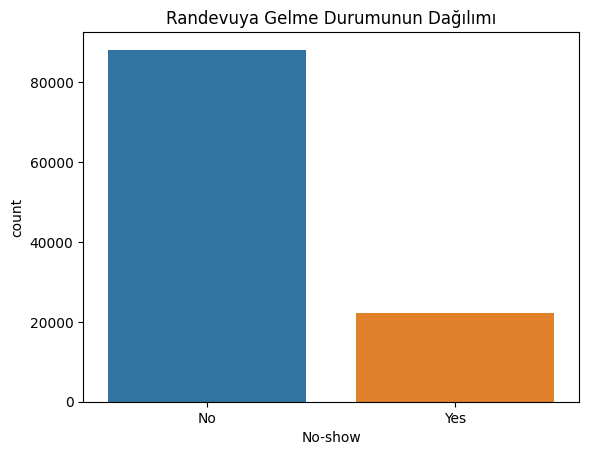

In [6]:
# Hedef değişkenin dağılımı
sns.countplot(x='No-show', data=data)
plt.title('Randevuya Gelme Durumunun Dağılımı')
plt.show()

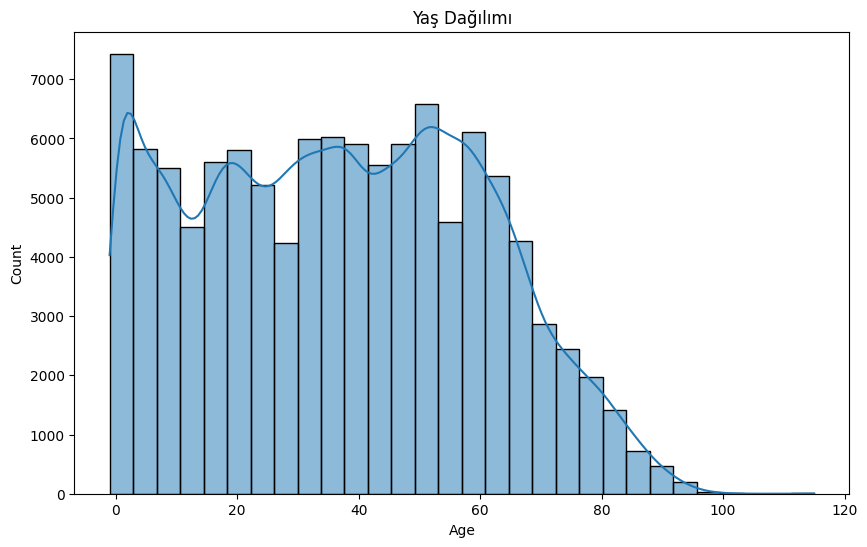

In [7]:
# Yaşın dağılımı
plt.figure(figsize=(10,6))
sns.histplot(data['Age'], bins=30, kde=True)
plt.title('Yaş Dağılımı')
plt.show()

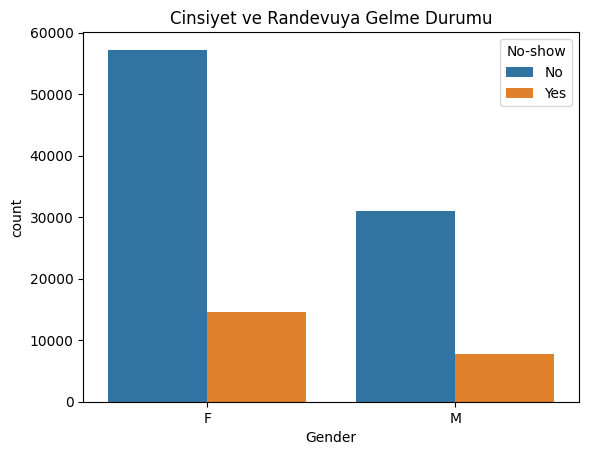

In [8]:
# Cinsiyetin randevuya gelme durumu ile ilişkisi
sns.countplot(x='Gender', hue='No-show', data=data)
plt.title('Cinsiyet ve Randevuya Gelme Durumu')
plt.show()

Açıklama:
* isnull().sum() ile eksik veri olup olmadığını kontrol ediyoruz.
* Hedef değişkenin (No-show) sınıf dengesini countplot ile görselleştiriyoruz.
* Yaş değişkeninin dağılımını histogram ile inceliyoruz.
* Cinsiyetin randevuya gelme durumu ile olan ilişkisini incelemek için yine countplot kullanıyoruz.

3. Veri Ön İşleme
Veri üzerinde gerekli temizleme ve dönüşümleri yapacağız.

In [9]:
# Tarih sütunlarını dönüştür
data['ScheduledDay'] = pd.to_datetime(data['ScheduledDay'])
data['AppointmentDay'] = pd.to_datetime(data['AppointmentDay'])

In [10]:
# Randevu günü ve planlanma günü arasındaki farkı hesapla
data['AppointmentDiff'] = (data['AppointmentDay'] - data['ScheduledDay']).dt.days

In [11]:
# Kategorik değişkenleri one-hot encoding ile dönüştür
data = pd.get_dummies(data, columns=['Gender', 'Neighbourhood'], drop_first=True)

In [12]:
# Hedef değişkeni binary formatına çevir (Yes -> 1, No -> 0)
data['No-show'] = data['No-show'].apply(lambda x: 1 if x == 'Yes' else 0)

In [13]:
# Yaş sütununda negatif değer var mı kontrol et ve filtrele
data = data[data['Age'] >= 0]

Açıklama:
* ScheduledDay ve AppointmentDay tarih formatına çevrildi, ardından bu iki tarih arasındaki fark hesaplandı (AppointmentDiff).
* Gender ve Neighbourhood kategorik değişkenlerini sayısal hale getirmek için one-hot encoding kullandık.
* Hedef değişken olan No-show'u binary forma çevirdik (Yes -> 1, No -> 0).
* Yaş sütunundaki olumsuz değerler filtrelendi.

4. Gözetimli Öğrenme (Sınıflandırma)
Şimdi, randevuya gelip gelmeme durumunu tahmin etmek için sınıflandırma modelleri oluşturacağız.

In [14]:
# Gerekli kütüphaneler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

In [15]:
# Özellik ve hedef değişkenler
X = data.drop(['No-show', 'ScheduledDay', 'AppointmentDay', 'AppointmentID', 'PatientId'], axis=1)
y = data['No-show']

In [16]:
# Veriyi eğitim ve test seti olarak ayır
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [17]:
# Rastgele Orman modeli eğit
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [18]:
# Tahmin yap
y_pred = model.predict(X_test)

In [19]:
# Doğruluk ve sınıflandırma raporu
print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
print(classification_report(y_test, y_pred))

Accuracy: 0.7731769105494903
              precision    recall  f1-score   support

           0       0.83      0.91      0.86     26560
           1       0.39      0.24      0.29      6598

    accuracy                           0.77     33158
   macro avg       0.61      0.57      0.58     33158
weighted avg       0.74      0.77      0.75     33158



Açıklama:
* train_test_split ile veriyi eğitim ve test seti olarak ayırdık.
* Rastgele Orman sınıflandırma modelini (RandomForestClassifier) kullanarak modeli eğittik.
* Test verisi üzerinde tahminler yaparak doğruluk ve sınıflandırma raporlarını inceledik.

5. Gözetimsiz Öğrenme (Kümeleme)
Şimdi hastaları kümeleme algoritmalarıyla segmente edeceğiz.

In [20]:
# Gerekli kütüphaneler
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [21]:
# Veriyi ölçeklendir
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [22]:
# K-Means kümeleme
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X_scaled)

KMeans(n_clusters=3, random_state=42)

In [23]:
# Küme etiketlerini veriye ekle
data['Cluster'] = kmeans.labels_

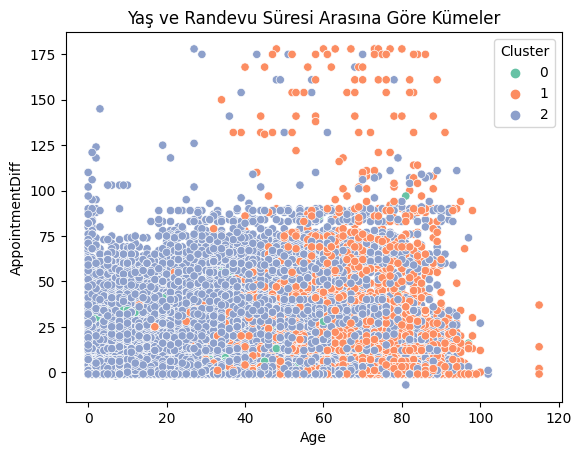

In [24]:
# Küme sonuçlarını görselleştir
sns.scatterplot(x='Age', y='AppointmentDiff', hue='Cluster', data=data, palette='Set2')
plt.title('Yaş ve Randevu Süresi Arasına Göre Kümeler')
plt.show()

Açıklama:
* StandardScaler ile veriyi ölçeklendirdik.
* K-Means algoritması ile veriyi 3 kümeye ayırdık (n_clusters=3).
* Yaş ve randevu süresi arasındaki ilişkiyi küme sonuçlarına göre görselleştirdik.

6. Hiperparametre Optimizasyonu
Random Forest modelinde hiperparametre optimizasyonu yaparak en iyi parametreleri bulacağız.

In [25]:
from sklearn.model_selection import GridSearchCV

Hiperparametre aralığını daha dar tutarak arama alanını küçültebilirsin. Örneğin, çok geniş bir parametre aralığı yerine daha küçük bir aralık belirlemek CPU yükünü azaltabilir.

In [26]:
# Hiperparametreler
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10]
}

In [27]:
# Hiperparametre aralığını daralt
param_grid = {
    'n_estimators': [50, 100],
    'max_depth': [10, 20],
    'min_samples_split': [2, 5]
}

In [28]:
# GridSearchCV
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=3, scoring='accuracy')
grid_search.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=RandomForestClassifier(random_state=42),
             param_grid={'max_depth': [10, 20], 'min_samples_split': [2, 5],
                         'n_estimators': [50, 100]},
             scoring='accuracy')

Bu şekilde daha az sayıda kombinasyon denenir ve işlem süresi kısalır.

GridSearchCV tüm kombinasyonları denerken, RandomizedSearchCV sadece rastgele seçilmiş bir kombinasyon sayısı ile arama yapar. Bu, arama süresini önemli ölçüde kısaltabilir.

RandomizedSearchCV ile Hiperparametre Araması:

In [29]:
from sklearn.model_selection import RandomizedSearchCV

In [30]:
# RandomizedSearchCV kullanarak daha az kombinasyon dene
random_search = RandomizedSearchCV(estimator=model, param_distributions=param_grid, 
                                   n_iter=8, cv=3, scoring='accuracy', random_state=42)

random_search.fit(X_train, y_train)

RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(random_state=42),
                   n_iter=8,
                   param_distributions={'max_depth': [10, 20],
                                        'min_samples_split': [2, 5],
                                        'n_estimators': [50, 100]},
                   random_state=42, scoring='accuracy')

In [31]:
# En iyi parametreler
print(f"Best parameters: {random_search.best_params_}")

Best parameters: {'n_estimators': 100, 'min_samples_split': 2, 'max_depth': 20}


In [32]:
# En iyi model ile tahmin
best_model = grid_search.best_estimator_
y_pred_best = best_model.predict(X_test)

In [33]:
# En iyi modelin doğruluğu
print(f"Optimized Accuracy: {accuracy_score(y_test, y_pred_best)}")

Optimized Accuracy: 0.8014355509982508


Açıklama:
n_iter parametresi ile kaç kombinasyonun denenmesini istediğini belirtebilirsin. Örneğin, n_iter=8 seçildiğinde sadece 8 kombinasyon rastgele denenir.
Bu, işlem süresini ve CPU kullanımını büyük ölçüde azaltacaktır.